Import jewellery dataset nd display details

In [1]:
from pycaret.datasets import get_data
jewellery = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


Display dataset details

In [2]:
jewellery.shape

(505, 4)

Create unseen data samples

In [3]:
data = jewellery.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = jewellery.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (480, 4)
Unseen Data For Predictions: (25, 4)


Run preprocess setup

In [4]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, use_gpu = True)

,Description,Value
0,session_id,5242
1,Original Data,"(480, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(480, 4)"
9,CPU Jobs,-1


Run on jewellery dataset

In [5]:
data = jewellery.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = jewellery.drop(data.index).reset_index(drop=True)

In [6]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.756,1475.5598,0.3762,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5242, tol=0.0001, verbose=0)


In [7]:
kmodes = create_model('kmodes', num_clusters = 6)
print(kmodes)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4988,20.8367,3.3452,0,0,0


KModes(cat_dissim=<function matching_dissim at 0x000001E32FEE54C0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=5242,
       verbose=0)


In [8]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Age,Income,SpendingScore,Savings,Cluster
0,87,24578,0.376165,17789.247522,Cluster 0
1,62,68279,0.719685,7028.675510,Cluster 1
2,37,106894,0.343236,14075.217366,Cluster 2
3,35,112878,0.300914,13755.482302,Cluster 2
4,89,26127,0.304474,17194.828019,Cluster 0


Plot K-Means clusters

In [9]:
plot_model(kmeans)

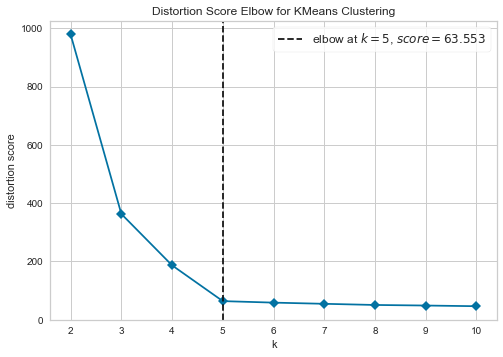

In [10]:
plot_model(kmeans, plot = 'elbow')

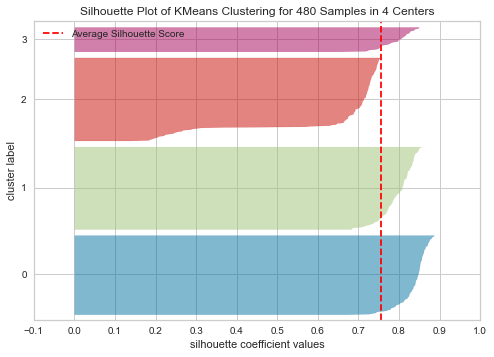

In [11]:
plot_model(kmeans, plot = 'silhouette')

In [12]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [13]:
plot_model(kmeans, plot = 'distribution', feature = 'Income')

In [14]:
plot_model(kmeans, plot = 'distribution', feature = 'SpendingScore')

In [15]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,65,71229,0.787890,9024.337461,Cluster 1
1,86,23400,0.278036,15215.281264,Cluster 0
2,32,108417,0.287371,16696.398659,Cluster 2
3,84,24105,0.271809,16524.902538,Cluster 0
4,84,30481,0.397023,16837.205965,Cluster 0
